In [5]:

#import

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures, StandardScaler







In [6]:

data = pd.read_csv("kc_house_data.csv", sep=',')

data


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:xlabel='price', ylabel='Count'>

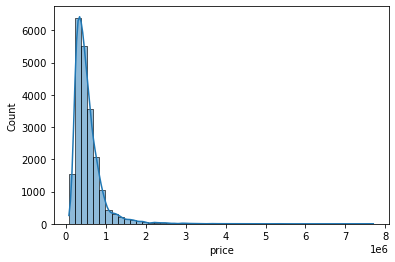

In [7]:

sns.histplot(data['price'], kde=True ,bins=50)


In [12]:
#Spliting dataset into a training set and a testing set. 

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
x=data["sqft_living"].values
y = data['price'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%





In [22]:
from sklearn import linear_model , metrics
from sklearn.metrics import mean_squared_error,r2_score

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


ValueError: Expected 2D array, got 1D array instead:
array=[ 970 2040 1830 ... 3230 1930 1120].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

NameError: name 'predicted' is not defined

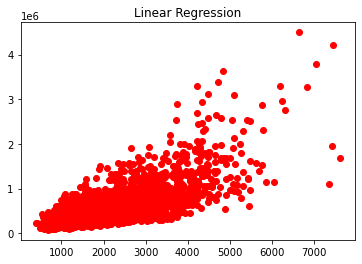

In [23]:
#plot the linear regression

plt.scatter(x_test, y_test,color="r")
plt.title("Linear Regression")
plt.plot(x_test, predicted,color='black')
plt.show()

In [26]:
x = data[['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade', 'sqft_living15', 'lat']].values
y = data['price'].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%
mr = LinearRegression() #build linear regression model
mr.fit(x_train,y_train) #fitting the training data
pred_mr = mr.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test, pred_mr))
print("R squared", metrics.r2_score(y_test, pred_mr))

MSE 42586570874.90046
R squared 0.6612519299573789
